In [1]:
#import libraries
import numpy as np
import pandas as pd
import re
import nltk
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [2]:
#data review hotel
data=pd.read_excel("data review hotel.xlsx")
text=data['review']
text

0     tapi kamarnya banyak serangganya setiap saya m...
1     proses menunggu kamar lama sampai setengah jam...
2     restonya kecil, beberapa sudut kamar terlihat ...
3     ac-nya panas dan air ac-nya menetes. selimut d...
4     saya minta bed 1 besar, tapi yang saya dapat 2...
                            ...                        
94    hotel yang selalu saya datangi jika saya ke su...
95                dekat dengan bandara, aksesnya mudah.
96    selalu keren, kemarin dapat viewnya menghadap ...
97              puas, bersih dan rapi, fasilitas cukup.
98    sesuai dengan harga. kamar cukup luas. kasur n...
Name: review, Length: 99, dtype: object

In [3]:
#punctuation
data_punc = []
for line in text:
        result = re.sub(r"[-,.()?]", " ", line)
        data_punc.append(result)

In [13]:
#stopword
stopword=open("stopwords.txt").read()
stopword=set(stopword.split())
not_stopword=[]
new_stopword=set([word for word in stopword if not word in not_stopword])

In [15]:
data_stop=[]
for line in data_punc:
    word_token=nltk.word_tokenize(line)
    word_token=[word for word in word_token if not word in stopword]
    data_stop.append(" ".join(word_token))

In [16]:
#menghilangkan double space
data_doublespace=[]
for line in data_stop:
    result=re.sub(r'\s+',' ',line)
    data_doublespace.append(result)
data_doublespace

['kamarnya banyak serangganya setiap mau masuk kamar tolong diperhatikan kebersihan kamarnya',
 'proses menunggu kamar lama sampai setengah jaman staf cuek',
 'restonya kecil beberapa sudut kamar terlihat kotor rusak',
 'ac panas air ac menetes selimut seprei kasurnya bau apek waktu menginap listrik hotel mati tidak langsung otomatis menyala',
 'minta bed 1 besar dapat 2 bed gabung menjadi 1 sehingga tengah amblas kalau dibuat tidur bantal harusnya sudah diganti karena sudah aneh dipakai',
 'hotelnya bagus makanannya lumayan enak',
 'perlu meningkatkan servisnya jutek kurang senyum not hands on servis',
 'tempat nyaman servis puas fasilitas lengkap cocok tempat liburan keluarga menu masakan enak pokoknya mantul mantap betul',
 'ac bunyi sepertinya mau rusak panas',
 'sedikit berbau air toiletnya selainnya nice',
 'servisnya kurang cepat handuk lubang2 sobek2 makan pagi standar piring lain lain kotor',
 'hotel keren view kolamnya indah',
 'suasananya senang fasilitas lengkap servis puas

In [5]:
#stemmer
factory=StemmerFactory()
stemmer=factory.create_stemmer()
df_stemmed=map(lambda x: stemmer.stem(x), data_doublespace)
data_stemmed=list(df_stemmed)

### Word Cloud

In [9]:
#library
import string
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [22]:
a=str(data_doublespace)
word=re.sub(r"'","",a)
word

'[kamarnya banyak serangganya setiap mau masuk kamar tolong diperhatikan kebersihan kamarnya, proses menunggu kamar lama sampai setengah jaman staf cuek, restonya kecil beberapa sudut kamar terlihat kotor rusak, ac panas air ac menetes selimut seprei kasurnya bau apek waktu menginap listrik hotel mati tidak langsung otomatis menyala, minta bed 1 besar dapat 2 bed gabung menjadi 1 sehingga tengah amblas kalau dibuat tidur bantal harusnya sudah diganti karena sudah aneh dipakai, hotelnya bagus makanannya lumayan enak, perlu meningkatkan servisnya jutek kurang senyum not hands on servis, tempat nyaman servis puas fasilitas lengkap cocok tempat liburan keluarga menu masakan enak pokoknya mantul mantap betul, ac bunyi sepertinya mau rusak panas, sedikit berbau air toiletnya selainnya nice, servisnya kurang cepat handuk lubang2 sobek2 makan pagi standar piring lain lain kotor, hotel keren view kolamnya indah, suasananya senang fasilitas lengkap servis puas tempat strategis, breakfastnya enak

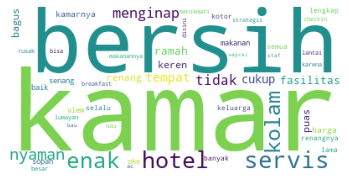

In [24]:
wordcloud=WordCloud(collocations=False,background_color='white',stopwords=stopword, max_words=50, max_font_size=200,random_state=1).generate(word)
print(wordcloud)
fig=plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
fig.savefig("wordcloud_ets.png",dpi=900)

### TF IDF

In [26]:
#library
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vectorizer=CountVectorizer(min_df=0.03)
x=vectorizer.fit_transform(data_doublespace)
DTM=pd.DataFrame(x.toarray(),columns=vectorizer.get_feature_names())
DTM['kalimat_tweet']=data_doublespace
DTM['sum_features']=DTM.sum(axis=1)
DTM=DTM.loc[DTM['sum_features']!=0].drop(['sum_features'],axis=1)
DTM.to_csv('DTM.csv')

In [28]:
DTM

,ac,air,bagus,baik,balik,bantal,banyak,bau,beberapa,berbeda,...,terimakasih,tidak,tidur,time,toilet,toiletnya,view,viewnya,waktu,kalimat_tweet
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,kamarnya banyak serangganya setiap mau masuk k...
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,proses menunggu kamar lama sampai setengah jam...
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,restonya kecil beberapa sudut kamar terlihat k...
3,2,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,ac panas air ac menetes selimut seprei kasurny...
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,minta bed 1 besar dapat 2 bed gabung menjadi 1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,hotel selalu datangi jika ke surabaya oke
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,dekat bandara aksesnya mudah
96,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,1,0,selalu keren kemarin dapat viewnya menghadap j...
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,puas bersih rapi fasilitas cukup


In [29]:
vectorizer=TfidfVectorizer(min_df=0.03)
vec=vectorizer.fit_transform(data_doublespace)
TFIDF=pd.DataFrame(vec.toarray(),columns=vectorizer.get_feature_names())
TFIDF['kalimat_tweet']=data_doublespace
TFIDF['sum_features']=TFIDF.sum(axis=1)
TFIDF=TFIDF.loc[TFIDF['sum_features']!=0].drop(['sum_features'],axis=1)
TFIDF.to_csv('TFIDF.csv')
TFIDF

,ac,air,bagus,baik,balik,bantal,banyak,bau,beberapa,berbeda,...,terimakasih,tidak,tidur,time,toilet,toiletnya,view,viewnya,waktu,kalimat_tweet
0,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.35881,0.000000,0.000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,kamarnya banyak serangganya setiap mau masuk k...
1,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,proses menunggu kamar lama sampai setengah jam...
2,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.594,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,restonya kecil beberapa sudut kamar terlihat k...
3,0.63966,0.337691,0.0,0.0,0.0,0.000000,0.00000,0.337691,0.000,0.0,...,0.000000,0.226728,0.000000,0.0,0.0,0.0,0.0,0.000000,0.337691,ac panas air ac menetes selimut seprei kasurny...
4,0.00000,0.000000,0.0,0.0,0.0,0.342835,0.00000,0.000000,0.000,0.0,...,0.000000,0.000000,0.324701,0.0,0.0,0.0,0.0,0.000000,0.000000,minta bed 1 besar dapat 2 bed gabung menjadi 1...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,hotel selalu datangi jika ke surabaya oke
95,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,dekat bandara aksesnya mudah
96,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000,0.0,...,0.305336,0.216453,0.000000,0.0,0.0,0.0,0.0,0.322387,0.000000,selalu keren kemarin dapat viewnya menghadap j...
97,0.00000,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,puas bersih rapi fasilitas cukup


### Asscocation Rule Mining

In [35]:
from apyori import apriori

In [30]:
data_doublespace

['kamarnya banyak serangganya setiap mau masuk kamar tolong diperhatikan kebersihan kamarnya',
 'proses menunggu kamar lama sampai setengah jaman staf cuek',
 'restonya kecil beberapa sudut kamar terlihat kotor rusak',
 'ac panas air ac menetes selimut seprei kasurnya bau apek waktu menginap listrik hotel mati tidak langsung otomatis menyala',
 'minta bed 1 besar dapat 2 bed gabung menjadi 1 sehingga tengah amblas kalau dibuat tidur bantal harusnya sudah diganti karena sudah aneh dipakai',
 'hotelnya bagus makanannya lumayan enak',
 'perlu meningkatkan servisnya jutek kurang senyum not hands on servis',
 'tempat nyaman servis puas fasilitas lengkap cocok tempat liburan keluarga menu masakan enak pokoknya mantul mantap betul',
 'ac bunyi sepertinya mau rusak panas',
 'sedikit berbau air toiletnya selainnya nice',
 'servisnya kurang cepat handuk lubang2 sobek2 makan pagi standar piring lain lain kotor',
 'hotel keren view kolamnya indah',
 'suasananya senang fasilitas lengkap servis puas

In [31]:
data_doublespace=pd.DataFrame(data_doublespace)
data_doublespace.to_excel('data doublespace.xlsx')

In [32]:
dat=pd.read_excel('data doublespace.xlsx')
dat

,0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,kamarnya,banyak,serangganya,setiap,mau,masuk,kamar,tolong,diperhatikan,kebersihan,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,proses,menunggu,kamar,lama,sampai,setengah,jaman,staf,cuek,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,restonya,kecil,beberapa,sudut,kamar,terlihat,kotor,rusak,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ac,panas,air,ac,menetes,selimut,seprei,kasurnya,bau,apek,...,tidak,langsung,otomatis,menyala,NaN,NaN,NaN,NaN,NaN,NaN
4,minta,bed,1,besar,dapat,2,bed,gabung,menjadi,1,...,tidur,bantal,harusnya,sudah,diganti,karena,sudah,aneh,dipakai,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,hotel,selalu,datangi,jika,ke,surabaya,oke,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,dekat,bandara,aksesnya,mudah,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,selalu,keren,kemarin,dapat,viewnya,menghadap,jalan,semua,oke,cuma,...,bisa,berfungsi,tolong,diperhatikan,terimakasih,NaN,NaN,NaN,NaN,NaN
97,puas,bersih,rapi,fasilitas,cukup,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
records=[]
for i in range(0,99): records.append([str(dat.values[i,j]) for j in range (0,25) if str(dat.values[i,j]) !='nan'])

In [36]:
association_rules=apriori(records, min_support=0.05, min_confidence=0.25, min_lift=2, min_length=2)
association_results=list(association_rules)

In [37]:
print(len(association_results))

14


In [38]:
print(association_results[0])

RelationRecord(items=frozenset({'bersih', 'cukup'}), support=0.050505050505050504, ordered_statistics=[OrderedStatistic(items_base=frozenset({'cukup'}), items_add=frozenset({'bersih'}), confidence=0.6249999999999999, lift=2.8124999999999996)])


In [39]:
for item in association_results:
    pair=item[0]
    items=[x for x in pair]
    print("Rules: "+items[0]+"->"+items[1])
    print("Support: "+ str(item[1]))
    print("Cofindence: "+ str(item[2][0][2]))
    print("Lift: "+ str(item[2][0][3]))
    print("======================================")

Rules: bersih->cukup
Support: 0.050505050505050504
Cofindence: 0.6249999999999999
Lift: 2.8124999999999996
Rules: bersih->ramah
Support: 0.050505050505050504
Cofindence: 0.4545454545454546
Lift: 2.045454545454546
Rules: makanan->enak
Support: 0.050505050505050504
Cofindence: 0.2777777777777778
Lift: 3.928571428571429
Rules: hotel->fasilitas
Support: 0.050505050505050504
Cofindence: 0.41666666666666663
Lift: 2.1710526315789473
Rules: lengkap->fasilitas
Support: 0.06060606060606061
Cofindence: 0.5
Lift: 8.25
Rules: puas->fasilitas
Support: 0.06060606060606061
Cofindence: 0.5
Lift: 4.95
Rules: tempat->fasilitas
Support: 0.050505050505050504
Cofindence: 0.41666666666666663
Lift: 3.1730769230769225
Rules: kolam->menginap
Support: 0.06060606060606061
Cofindence: 0.3333333333333333
Lift: 2.1999999999999997
Rules: kolam->renang
Support: 0.09090909090909091
Cofindence: 0.5
Lift: 5.5
Rules: kolam->renangnya
Support: 0.06060606060606061
Cofindence: 0.3333333333333333
Lift: 5.499999999999999
Rules

##### Rules: Bersih->Servis. Kalimat yang mengandung kamar dari kelesuruhan kalimat memiliki rasio sebesar 0.0505. Nilai confidence 71% artinya 71% kalimat yang mengandung bersih juga mengandung servis. Lift>1 artinya orang yang menggunakan kata bersih juga menggunakan kata servis

##### Rules: servis->ramah. Kalimat yang mengandung cukup dari kelesuruhan kalimat memiliki rasio sebesar 0.0606. Nilai confidence 54% artinya 54% kalimat yang mengandung servis juga mengandung ramah. Lift>1 artinya orang yang menggunakan kata servis juga menggunakan kata ramah

##### Rules: puas->servis. Kalimat yang mengandung inap dari kelesuruhan kalimat memiliki rasio sebesar 0.0707. Nilai confidence 70% artinya 70% kalimat yang mengandung puas juga mengandung servis. Lift>1 artinya orang yang menggunakan kata puas juga menggunakan kata servis